Assignment: Algerian Forest Fire Data Analysis using Multiple Linear Regression
Objective: The objective of this assignment is to analyze the FWI in the Algerian forest fire dataset using multiple linear regression, evaluate the model's performance, create pickle files, and test the model on unseen data.

Instructions:
1.	Data Preparation: a. Obtain the Algerian forest fire dataset, containing variables such as
temperature, humidity, wind speed, location, and fire intensity. b. Clean the dataset, handling missing values and outliers if necessary. c. Split the dataset into a training set (80% of the data) and a test (unseen) set (20% of the data).
2.	Model Training: a. Use multiple linear regression to model the relationship between the
independent variables (temperature, humidity, wind speed) and the dependent variable (fire intensity). b. Fit the multiple linear regression model to the training set. c. Tune
hyperparameters, if necessary, to improve the model's performance.
3.	Model Evaluation: a. Evaluate the trained multiple linear regression model's performance on the test dataset. b. Calculate appropriate evaluation metrics such as mean squared error (MSE),
mean absolute error (MAE), or coefficient of determination (R-squared). c. Interpret the results and assess how well the model predicts fire intensity.
4.	Pickling the Model: a. Once you have a satisfactory multiple linear regression model, save it as a pickle file. b. Explain the purpose and benefits of pickling a model.
5.	Prediction on Unseen Data: a. Load the pickled multiple linear regression model. b. Preprocess the unseen data using the same transformations applied to the training data. c. Use the loaded model to predict the fire intensity on the unseen data. d. Evaluate the model's performance on the unseen data using the same evaluation metrics as in Step 3.
6.	Conclusion: Summarize the findings of your analysis on the Algerian forest fire data using multiple linear regression. Highlight the strengths and limitations of the model and provide recommendations for further improvements.


In [ ]:
"""
Michael Orlando Montanez Leal
c0889555
Assignment 1
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [ ]:
# Loading the dataset
data1 = pd.read_csv("Algerian_forest_fires_cleaned.csv")
data2 = data1[['Temperature', 'RH', 'Ws', 'FWI']]


In [ ]:
data2

,Temperature,RH,Ws,FWI
0,29,57,18,0.5
1,29,61,13,0.4
2,26,82,22,0.1
3,25,89,13,0.0
4,27,77,16,0.5
...,...,...,...,...
238,30,65,14,6.5
239,28,87,15,0.0
240,27,87,29,0.2
241,24,54,18,0.7


In [ ]:
#Checking for missing values
data2.isnull().sum()

Temperature    0
RH             0
Ws             0
FWI            0
dtype: int64

In [ ]:
#Checking for duplicated values
data2.duplicated().sum()

0

In [ ]:
#Description of my dataset
data2.describe()

,Temperature,RH,Ws,FWI
count,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,7.035391
std,3.628039,14.828160,2.811385,7.440568
min,22.000000,21.000000,6.000000,0.000000
25%,30.000000,52.500000,14.000000,0.700000
50%,32.000000,63.000000,15.000000,4.200000
75%,35.000000,73.500000,17.000000,11.450000
max,42.000000,90.000000,29.000000,31.100000


<Axes: >

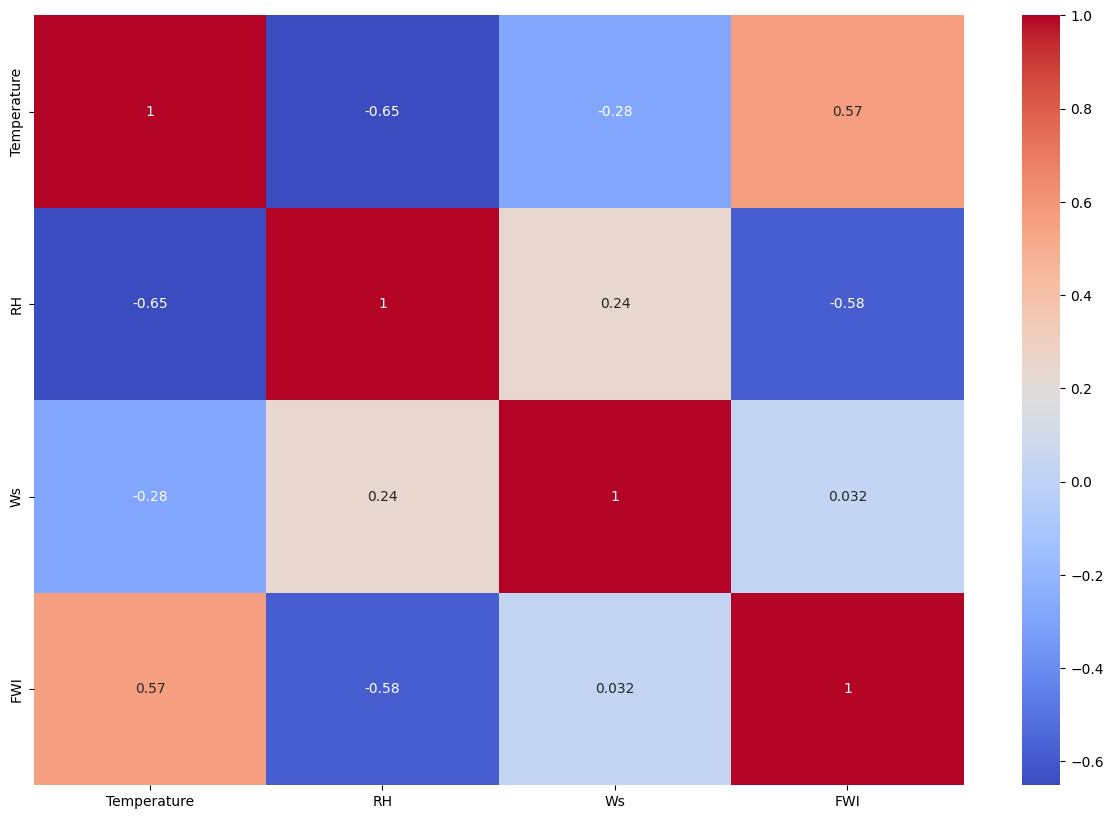

In [ ]:
#Correlational matrix with the given parameters for the assignment (Temperature, relative humidity and wind speed) and the dependent variable FWI
plt.figure(figsize = (15,10))
sns.heatmap(data2.corr(), cmap='coolwarm', annot = True)

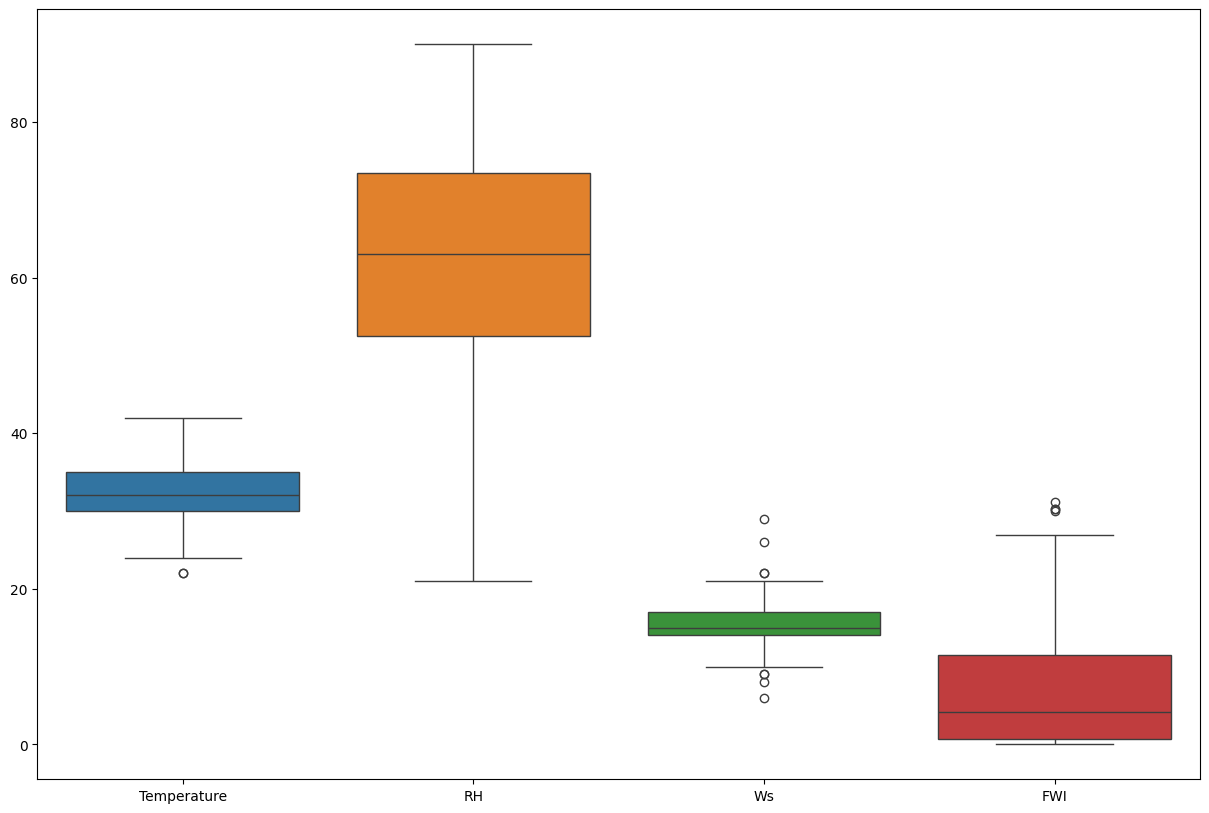

In [ ]:
#Box plot to check outliers and compare scales
plt.figure(figsize = (15,10))
sns.boxplot(data2)
plt.show()

Deleting outliers

In [ ]:
#First I print my dataset to see how many records I do have
print(data2)
print("*"*30)
#Now I create the functions to calculate the IQR and the limits to delete the outliers
Upper_limit = None
Lower_limit = None
def limitsOut(dataset1,feature): #Calculate outliers
  global Upper_limit, Lower_limit
  print("Before outliers")
  IQR_wt = dataset1[feature].quantile(0.75)-dataset1[feature].quantile(0.25)
  print(f'IQR_wt for {feature}: ',IQR_wt)
  Upper_limit = dataset1[feature].quantile(0.75)+1.5*IQR_wt
  print(f'Upper_limit for {feature}: ',Upper_limit)
  Lower_limit = dataset1[feature].quantile(0.25)-1.5*IQR_wt
  print(f'Lower_limit for {feature}: ',Lower_limit)
  print(f'max val of {feature}',dataset1[feature].max())
  print(f'min val of {feature}',dataset1[feature].min())
  outliers = dataset1[(dataset1[feature] < Lower_limit) | (dataset1[feature] > Upper_limit)]
  num_outliers = outliers.shape[0]
  print(f'Number of outliers for {feature}: {num_outliers}')
def RemoveOu(dataset1, feature): #Delete outliers
    global Upper_limit, Lower_limit
    print("*" * 30)
    print("After outliers")
    df1 = dataset1[(dataset1[feature] >= Lower_limit) & (dataset1[feature] <= Upper_limit)]
    return df1

     Temperature  RH  Ws  FWI
0             29  57  18  0.5
1             29  61  13  0.4
2             26  82  22  0.1
3             25  89  13  0.0
4             27  77  16  0.5
..           ...  ..  ..  ...
238           30  65  14  6.5
239           28  87  15  0.0
240           27  87  29  0.2
241           24  54  18  0.7
242           24  64  15  0.5

[243 rows x 4 columns]
******************************


In [ ]:
#Checking and deleting outliers according to temperature feature
limitsOut(data2,'Temperature')
df2 = RemoveOu(data2,'Temperature')
print("*"*30)
limitsOut(df2,'Temperature')

Before outliers
IQR_wt for Temperature:  5.0
Upper_limit for Temperature:  42.5
Lower_limit for Temperature:  22.5
max val of Temperature 42
min val of Temperature 22
Number of outliers for Temperature: 2
******************************
After outliers
******************************
Before outliers
IQR_wt for Temperature:  5.0
Upper_limit for Temperature:  42.5
Lower_limit for Temperature:  22.5
max val of Temperature 42
min val of Temperature 24
Number of outliers for Temperature: 0


In [ ]:
#Checking and deleting outliers according to relative humidity feature
limitsOut(df2,'RH')

Before outliers
IQR_wt for RH:  21.0
Upper_limit for RH:  104.5
Lower_limit for RH:  20.5
max val of RH 90
min val of RH 21
Number of outliers for RH: 0


In [ ]:
#Checking and deleting outliers according to wind speed feature
limitsOut(df2,'Ws')
df3 = RemoveOu(df2,'Ws')
print("*"*30)
limitsOut(df3,'Ws')

Before outliers
IQR_wt for Ws:  3.0
Upper_limit for Ws:  21.5
Lower_limit for Ws:  9.5
max val of Ws 29
min val of Ws 6
Number of outliers for Ws: 7
******************************
After outliers
******************************
Before outliers
IQR_wt for Ws:  3.0
Upper_limit for Ws:  21.5
Lower_limit for Ws:  9.5
max val of Ws 21
min val of Ws 10
Number of outliers for Ws: 0


In [ ]:
#Now we can see how many records we have after delete outliers and save our data frame in a new variable called df3
df3

,Temperature,RH,Ws,FWI
0,29,57,18,0.5
1,29,61,13,0.4
3,25,89,13,0.0
4,27,77,16,0.5
5,31,67,14,2.5
...,...,...,...,...
237,28,70,15,3.0
238,30,65,14,6.5
239,28,87,15,0.0
241,24,54,18,0.7


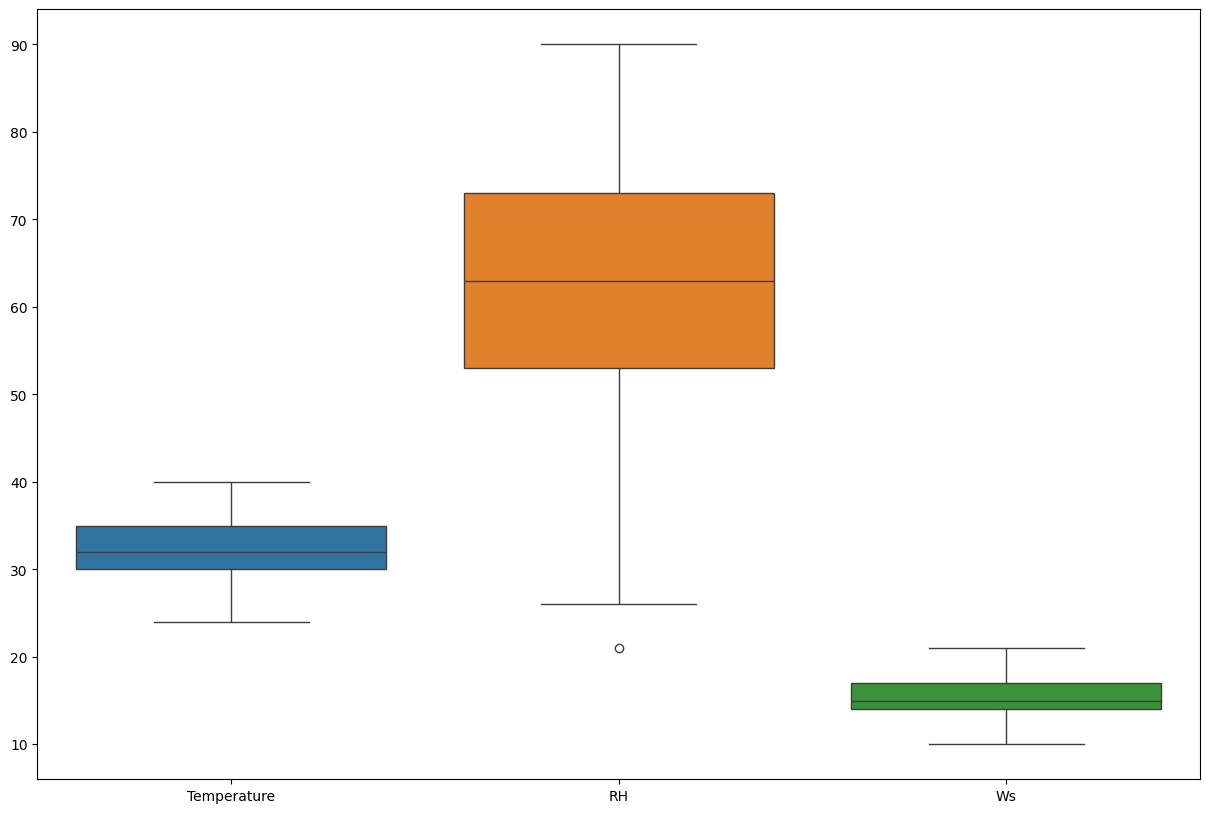

In [ ]:
#Boxes after removing outliers
plt.figure(figsize = (15,10))
sns.boxplot(df3.drop(columns=['FWI']))
plt.show()

Splitting data into training and testing

In [ ]:
X = df3.drop(columns=['FWI'])#Independent variables
y = df3['FWI'] #Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Temperature,RH,Ws
121,25,78,14
159,35,47,18
152,28,58,18
162,34,56,15
239,28,87,15
...,...,...,...
110,29,57,14
15,29,89,13
95,29,73,17
184,39,33,17


2.	Model Training: a. Use multiple linear regression to model the relationship between the
independent variables (temperature, humidity, wind speed) and the dependent variable (fire intensity).  


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fit the model to the training set
model.fit(X_train, y_train)


LinearRegression()

b. Fit the multiple linear regression model to the training set.

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_train)
# Calculate MAE
mae = mean_absolute_error(y_train, y_pred)
# Calculate MSE
mse = mean_squared_error(y_train, y_pred)
# Calculate R-squared
r2 = r2_score(y_train, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2:", r2)


Mean Absolute Error: 4.060113471590159
Mean Squared Error: 26.589224394251914
R2: 0.5057942612949781


c. Tune
hyperparameters, if necessary, to improve the model's performance.

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters to tune
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]}
# Initialize Ridge regression model
ridge = Ridge()
# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=10, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Initialize Ridge regression model with the best alpha
ridge = Ridge(alpha=best_alpha)

# Fit the model to the training set
ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge.predict(X_train)

# Calculate evaluation metrics
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print("Best Alpha:", best_alpha)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2:", r2)
#In this case, tuning didn't work as expected, since our R2 is still too low and similar to our R2 without tunning

Best Alpha: 100
Mean Absolute Error: 4.052031683449257
Mean Squared Error: 26.638682054328235
R2: 0.5048750069733694


3.	Model Evaluation: a. Evaluate the trained multiple linear regression model's performance on the test dataset.

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred2 = model.predict(X_test)

b. Calculate appropriate evaluation metrics such as mean squared error (MSE),
mean absolute error (MAE), or coefficient of determination (R-squared). c. Interpret the results and assess how well the model predicts fire intensity.


In [36]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred2)
# Calculate MSE
mse = mean_squared_error(y_test, y_pred2)
# Calculate R-squared
r2 = r2_score(y_test, y_pred2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2:", r2)

Mean Absolute Error: 5.506805528736258
Mean Squared Error: 46.481021431505155
R2: 0.19809485459170129


Mean Absolute Error (MAE):
MAE measures the average absolute difference between the actual and predicted values.
In this case, the MAE value of 5.51 indicates that, on average, the model's predictions are off by approximately 5.51 units of fire intensity.

Mean Squared Error (MSE):
The MSE value of 46.48 indicates the average squared difference between the actual and predicted values.

R-squared (R2):
R-squared measures the proportion of the variance in the dependent variable (fire intensity) that is explained by the independent variables (temperature, humidity, wind speed) included in the model.
The R2 value of 0.198 suggests that approximately 19.8% of the variance in fire intensity is explained by the independent variables in the model.

Overall Assessment:
The provided evaluation metrics indicate that the model's performance may be limited. So, it can be a good idea to include more features.
The relatively high MAE and MSE values suggest that the model's predictions have considerable errors on average.
The R2 value of 0.198 suggests that the model explains only a small proportion of the variance in fire intensity. Since I already performed methods to improve the result, such as refining features and exploring different algorithms, I suggest using more features or collecting more data to get better results.

4.	Pickling the Model: a. Once you have a satisfactory multiple linear regression model, save it as a pickle file. b. Explain the purpose and benefits of pickling a model.

In [37]:
import pickle
# Save the model to the local instance
with open("multiple_linear_regression_model.pkl", "wb") as file:
    pickle.dump(model, file)


We have different benefits such as:

* Persistence: Saving the model enables reuse without retraining, ensuring consistent performance over time.

* Portability: Pickled models can be easily shared across different systems and environments. We just have to import the right library.

* Version Control: Pickling facilitates versioning and collaboration, allowing easy tracking of changes.

* Speed: Loading a pickled model is faster than retraining, making it suitable for real-time applications.

* Security: Pickling allows models to be saved in binary format, safeguarding intellectual property.

5.	Prediction on Unseen Data: a. Load the pickled multiple linear regression model. b. Preprocess the unseen data using the same transformations applied to the training data. c. Use the loaded model to predict the fire intensity on the unseen data. d. Evaluate the model's performance on the unseen data using the same evaluation metrics as in Step 3.

In [39]:
# a. Load the pickled multiple linear regression model
import pickle

with open("multiple_linear_regression_model.pkl", "rb") as file:
    model3 = pickle.load(file)

# b. Use the loaded model to predict the fire intensity on the unseen data (X_test)
y_pred_test = model3.predict(X_test)

# c. Evaluate the model's performance on the unseen data (X_test, y_test) using the same evaluation metrics as before
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Mean Absolute Error (Unseen Data):", mae_test)
print("Mean Squared Error (Unseen Data):", mse_test)
print("R-squared (Unseen Data):", r2_test)

#I got the same results as is the same model

Mean Absolute Error (Unseen Data): 5.506805528736258
Mean Squared Error (Unseen Data): 46.481021431505155
R-squared (Unseen Data): 0.19809485459170129


The analysis of the Algerian forest fire data using multiple linear regression revealed the following insights:

* **Model Performance:**
The multiple linear regression model showed moderate performance in predicting fire intensity, with an average error of approximately 5.51 units.
It explained around 19.8% of the variance in fire intensity, indicating partial capture of underlying patterns.

* **Strengths:**
Provides valuable insights into the relationship between environmental factors (e.g., temperature, humidity, wind speed) and fire intensity.
Offers a quantitative approach to predicting fire intensity based on environmental conditions.

* **Limitations:**
The model's predictive capability may be hindered by factors like:
Simplistic assumptions: Linear regression may not fully capture the complexities of the data.
Missing relevant features: Additional factors influencing fire intensity may not have been considered. In this case, I noted different features from the original CSV file that can be useful to increase the performance of our model. However, I didn't consider using it because of the limitations of this assignment.
Data quality issues: Noisy or incomplete data may affect model accuracy.
The model only explains a fraction of the variance in fire intensity, leaving room for improvement.

* **Recommendations:**
* Feature Exploration: Investigate additional features to capture the relationship between environmental factors and fire intensity.
* Model Complexity: Explore more advanced models capable of handling nonlinear relationships, such as decision trees or ensemble methods.
* Data: Try to increase the dataset with more information/records.
* By implementing these recommendations, a more robust and accurate model for predicting fire intensity in Algerian forests can be developed, enhancing the model's effectiveness.